In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers

from tensorflow.keras.utils import to_categorical

import tensorflow as tf

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
x_train = x_train * 1/255.0
x_test = x_test * 1/255.0

In [6]:
print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 60000
Number of filtered test examples: 10000


In [7]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [8]:
y_train = to_categorical(y_train)

print(f"Label size {y_train.shape}")

Label size (60000, 10)


In [9]:
y_test = to_categorical(y_test)

print(f"Label size {y_test.shape}")

Label size (10000, 10)


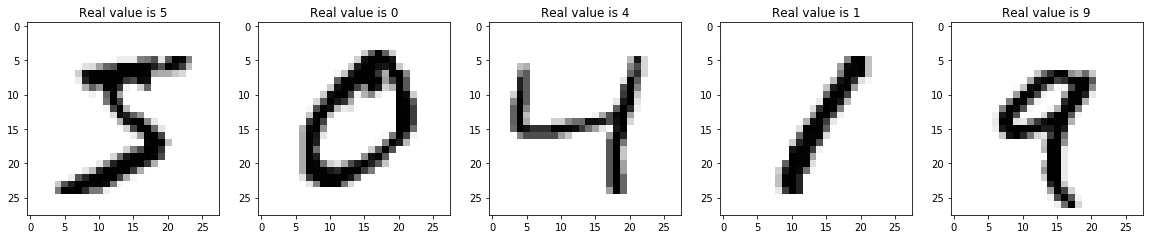

In [10]:
x_train__ = x_train.reshape(x_train.shape[0],28,28)

fig, ax = plt.subplots(1,5,figsize=(20,10))
for i, ax_ in enumerate(ax):
    ax_.imshow(x_train__[i], cmap= 'binary')
    digit = y_train[i].argmax()
    ax_.set(title=f"Real value is {digit}")

In [92]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,[3,3], activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(32, [3,3], activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))

In [96]:
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics='accuracy')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [101]:
history = model.fit(x_train,
                    y_train,
                    epochs=3,
                    verbose=1,
                    validation_data = (x_test,y_test))

Epoch 1/3
  92/1875 [>.............................] - ETA: 1:21 - loss: 10.2607 - accuracy: 0.5177

KeyboardInterrupt: 

In [94]:
history = model.fit(x_train,
                      y_train,
                      batch_size=128,
                      epochs=3,
                      verbose=1,
                      validation_data=(x_test, y_test))

cnn_results = model.evaluate(x_test, y_test)

Epoch 1/3
469/469 [==============================] - 71s 150ms/step - loss: 0.1261 - accuracy: 0.8667 - val_loss: 0.0414 - val_accuracy: 0.9638
Epoch 2/3
469/469 [==============================] - 64s 136ms/step - loss: 0.0714 - accuracy: 0.9381 - val_loss: 0.0411 - val_accuracy: 0.9617
Epoch 3/3
313/313 [==============================] - 3s 10ms/step - loss: 0.0216 - accuracy: 0.9782


In [64]:
history.history

{'loss': [0.016111498698592186, 0.013777733780443668, 0.012108424678444862],
 'accuracy': [0.9794333577156067, 0.9829833507537842, 0.9850000143051147],
 'val_loss': [0.007759219966828823, 0.008121813647449017, 0.0068543441593647],
 'val_accuracy': [0.9879000186920166, 0.9873999953269958, 0.9894999861717224]}

In [65]:
history.history['loss'][0]

0.016111498698592186

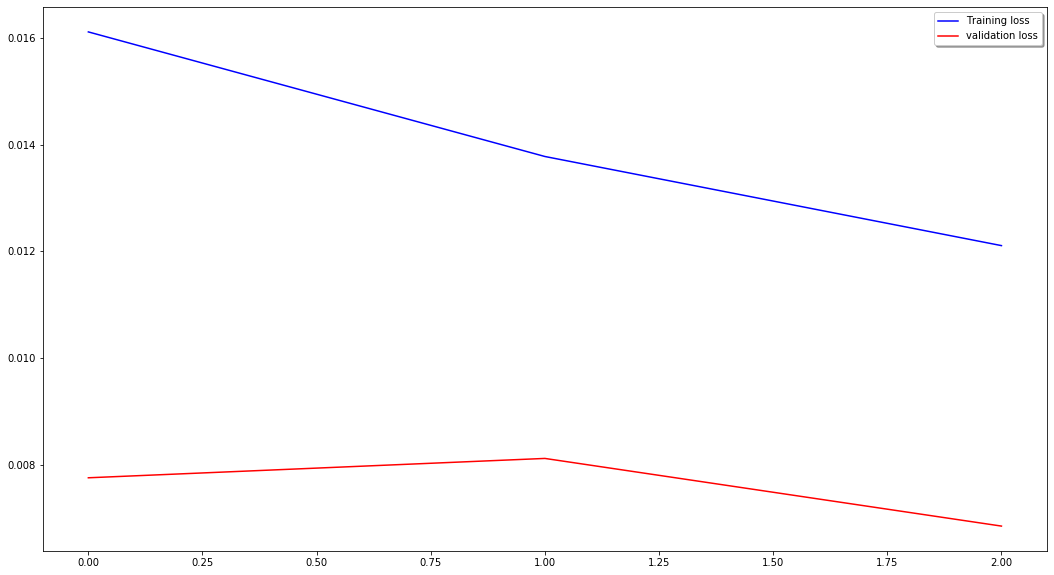

In [66]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(history.history['loss'], color='b', label="Training loss")
ax.plot(history.history['val_loss'], color='r', label="validation loss")
ax.legend(loc='best', shadow=True)

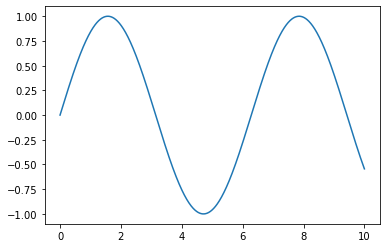

In [61]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

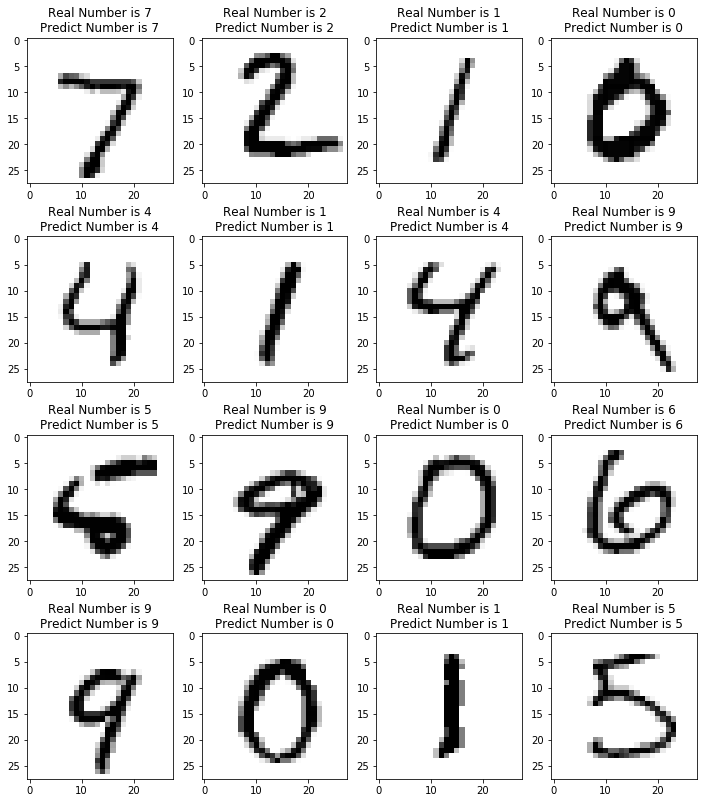

In [34]:
y_pred = model.predict(x_test)
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i])
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [38]:
pred = model.predict(x_test, verbose=1)

313/313 [==============================] - 3s 9ms/step
